In [4]:
import numpy as np              # Массивы (матрицы, векторы, линейная алгебра)
import matplotlib.pyplot as plt # Научная графика
import pandas as pd             # Таблицы и временные ряды (dataframe, series)
import seaborn as sns           # Еще больше красивой графики для визуализации данных
import sklearn                  # Алгоритмы машинного обучения

# Описание задачи
Этот набор данных содержит сведения о клиентах банка, а целевая переменная представляет собой двоичную переменную, отражающую тот факт, покинул ли клиент банк (закрыл свой счет) или он продолжает оставаться клиентом. Задача стоит в предугадывнии целевой переменной по остальным данным.

## 1. Загружаем данные

In [8]:
data_raw = pd.read_csv('Churn_Modelling.csv')

Таблица содержит данные от 10000 клиентов банка. Для каждого клиента указаны номер строки, в которой указаны его данные, уникальный id номер, фамилию, кредитный рейтинг, страна, к которой принадлежит клиент, пол, возраст, количество лет, в течение которых клиент работает с банком, банковский баланс, количество банковских продуктов, которыми пользуется клиент, двоичный флаг, указывающий, есть ли у клиента кредитная карта в банке или нет, двоичный флаг, указывающий, является ли клиент активным участником банка или нет, предполагаемая заработная плата клиента в долларах.

In [11]:
data_raw['Surname'] = data_raw['Surname'].astype('category')
data_raw['Geography'] = data_raw['Geography'].astype('category')
data_raw['Gender'] = data_raw['Gender'].astype('category')

In [13]:
data_raw.shape

(10000, 14)

In [15]:
data_raw

RowNumber  CustomerId    Surname  CreditScore Geography  Gender  Age  \
0             1    15634602   Hargrave          619    France  Female   42   
1             2    15647311       Hill          608     Spain  Female   41   
2             3    15619304       Onio          502    France  Female   42   
3             4    15701354       Boni          699    France  Female   39   
4             5    15737888   Mitchell          850     Spain  Female   43   
...         ...         ...        ...          ...       ...     ...  ...   
9995       9996    15606229   Obijiaku          771    France    Male   39   
9996       9997    15569892  Johnstone          516    France    Male   35   
9997       9998    15584532        Liu          709    France  Female   36   
9998       9999    15682355  Sabbatini          772   Germany    Male   42   
9999      10000    15628319     Walker          792    France  Female   28   

      Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0          2       0.00              1          1               1   
1          1   83807.86              1          0               1   
2          8  159660.80              3          1               0   
3          1       0.00              2          0               0   
4          2  125510.82              1          1               1   
...      ...        ...            ...        ...             ...   
9995       5       0.00              2          1               0   
9996      10   57369.61              1          1               1   
9997       7       0.00              1          0               1   
9998       3   75075.31              2          1               0   
9999       4  130142.79              1          1               0   

      EstimatedSalary  Exited  
0           101348.88       1  
1           112542.58       0  
2           113931.57       1  
3            93826.63       0  
4            79084.10       0  
...               ...     ...  
9995         96270.64       0  
9996        101699.77       0  
9997         42085.58       1  
9998         92888.52       1  
9999         38190.78       0  

[10000 rows x 14 columns]

In [17]:
data_raw['EstimatedSalary'].quantile([0.005,.01,.05,.1,.5,.9,.95,.99,.995])

0.005       878.78265
0.010      1842.82530
0.050      9851.81850
0.100     20273.58000
0.500    100193.91500
0.900    179674.70400
0.950    190155.37550
0.990    198069.73450
0.995    199139.16185
Name: EstimatedSalary, dtype: float64

In [19]:
data_raw['Balance'].quantile([0.005,.01,.05,.1,.5,.9,.95,.99,.995])

0.005         0.00000
0.010         0.00000
0.050         0.00000
0.100         0.00000
0.500     97198.54000
0.900    149244.79200
0.950    162711.66900
0.990    185967.98540
0.995    193126.28585
Name: Balance, dtype: float64

In [21]:
rows_to_drop = data_raw[
    (data_raw['Balance'] > data_raw['Balance'].quantile(0.995)) |
    (data_raw['EstimatedSalary'] < data_raw['EstimatedSalary'].quantile(0.005)) |
    (data_raw['EstimatedSalary'] > data_raw['EstimatedSalary'].quantile(0.995))].index
data = data_raw.drop(rows_to_drop)

## 2. Визуализация и описательная статистика

Получим сводную информацию о признаках:

In [25]:
data.describe()

RowNumber    CustomerId  CreditScore          Age       Tenure  \
count   9851.000000  9.851000e+03  9851.000000  9851.000000  9851.000000   
mean    5000.193077  1.569097e+07   650.462999    38.930768     5.013704   
std     2886.112055  7.192898e+04    96.660298    10.510709     2.891843   
min        1.000000  1.556570e+07   350.000000    18.000000     0.000000   
25%     2500.500000  1.562864e+07   584.000000    32.000000     3.000000   
50%     4998.000000  1.569094e+07   652.000000    37.000000     5.000000   
75%     7500.500000  1.575319e+07   718.000000    44.000000     7.000000   
max    10000.000000  1.581569e+07   850.000000    92.000000    10.000000   

             Balance  NumOfProducts    HasCrCard  IsActiveMember  \
count    9851.000000    9851.000000  9851.000000     9851.000000   
mean    75873.262768       1.531621     0.705817        0.514872   
std     61856.636701       0.581866     0.455698        0.499804   
min         0.000000       1.000000     0.000000        0.000000   
25%         0.000000       1.000000     0.000000        0.000000   
50%     96939.060000       1.000000     1.000000        1.000000   
75%    127284.910000       2.000000     1.000000        1.000000   
max    193125.850000       4.000000     1.000000        1.000000   

       EstimatedSalary       Exited  
count      9851.000000  9851.000000  
mean     100046.066669     0.202721  
std       56952.850187     0.402046  
min         878.870000     0.000000  
25%       51485.715000     0.000000  
50%      100130.950000     0.000000  
75%      148774.245000     0.000000  
max      199138.840000     1.000000

Для каждого количественного признака приведены средние значения, стандартное отклонение, минимальное и макимальное значения, медиана и значения квартилей.

In [28]:
data.describe(include=['category'])

Surname Geography Gender
count     9851      9851   9851
unique    2907         3      2
top      Smith    France   Male
freq        31      4936   5382

Построим диаграмму рассеивания для признаков 'EstimatedSalary' и 'CreditScore':

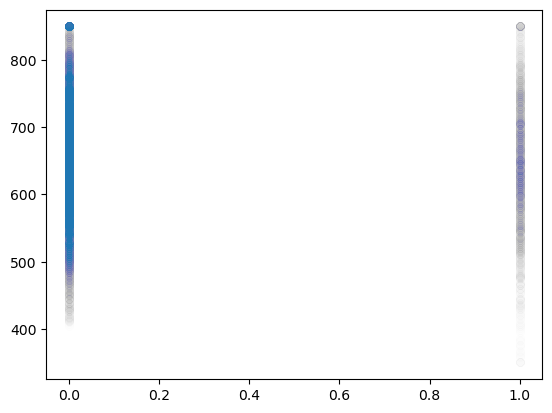

In [45]:
plt.scatter(data['Exited'], data['CreditScore'], alpha=0.005)
pass

Построим все возможные диаграммы рассеивания для каждой пары переменных:

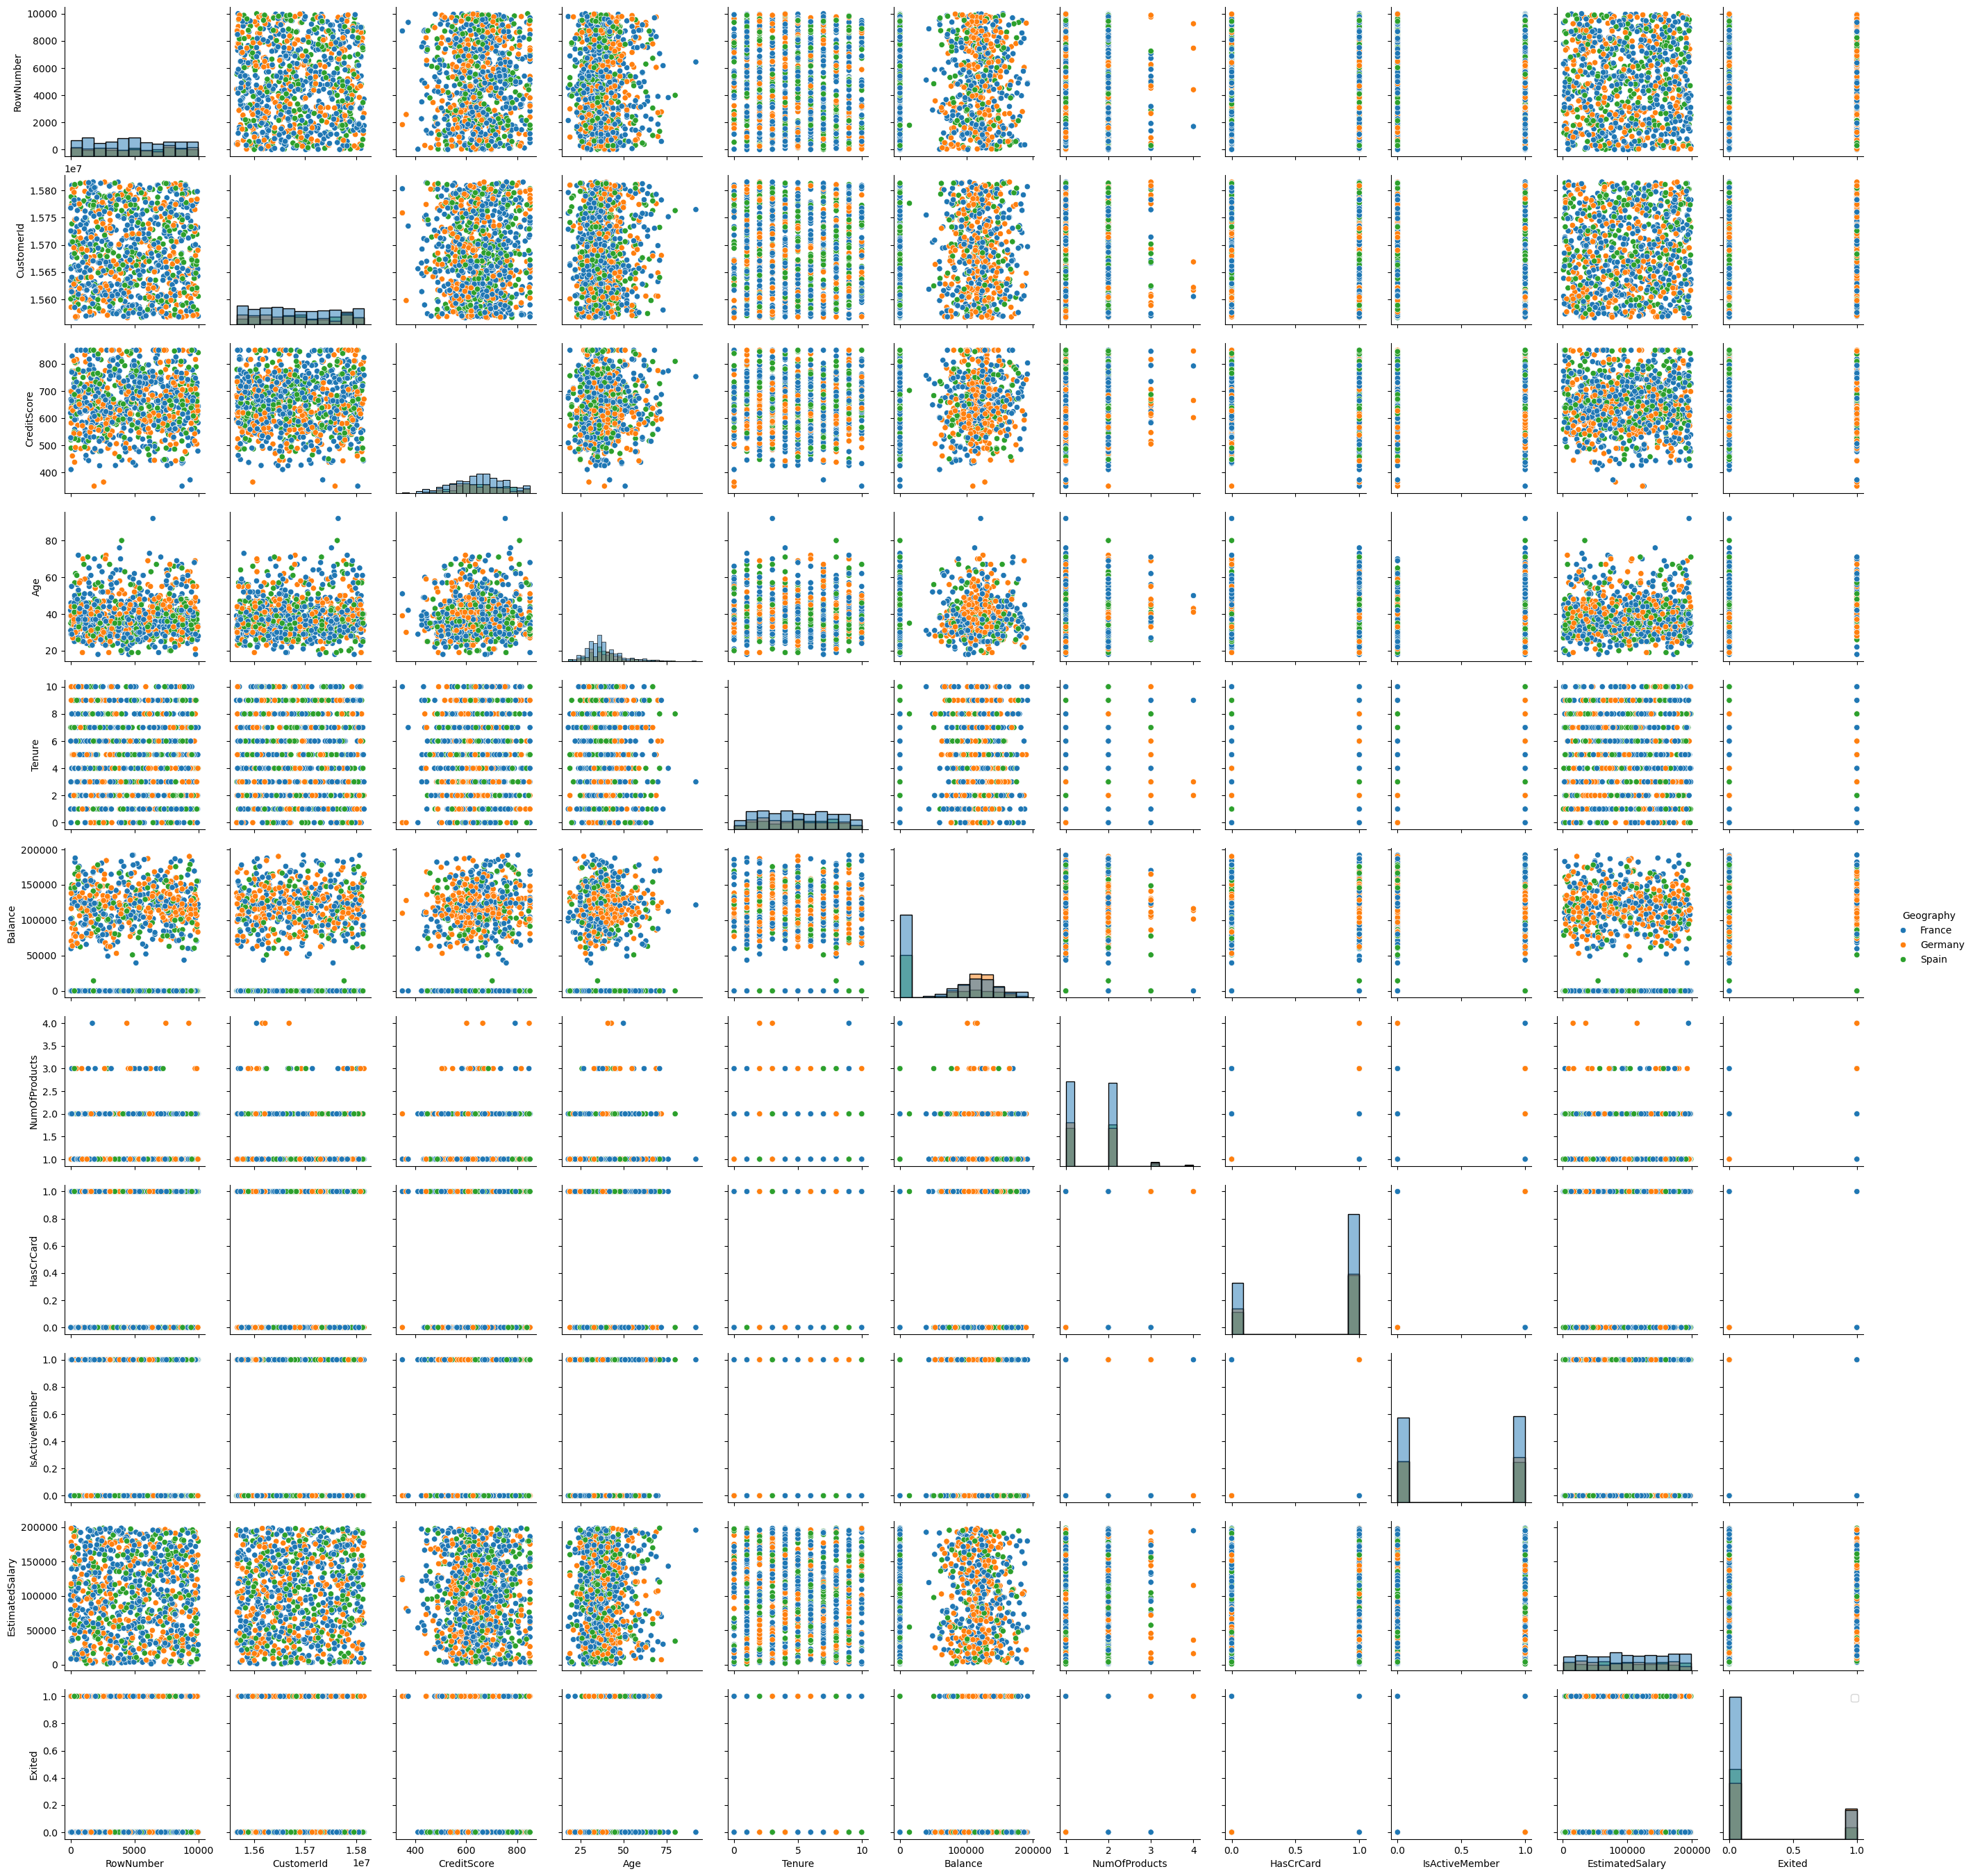

In [24]:
sns.pairplot(data.iloc[random_subset], hue='Geography', diag_kind='hist')
plt.legend([])
pass

Построим ящики с усами для разных признаков:

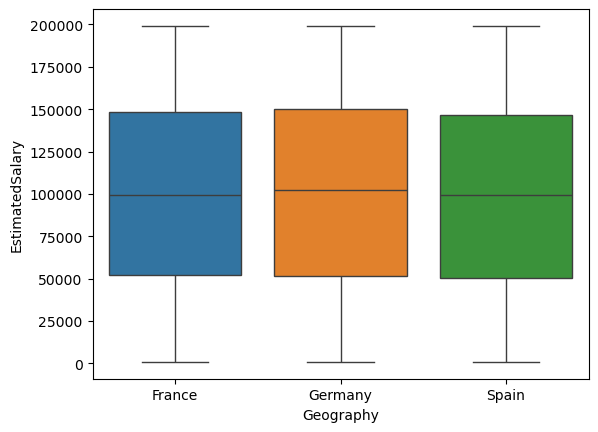

In [26]:
sns.boxplot(x="Geography", y="EstimatedSalary", hue="Geography", data=data)
pass

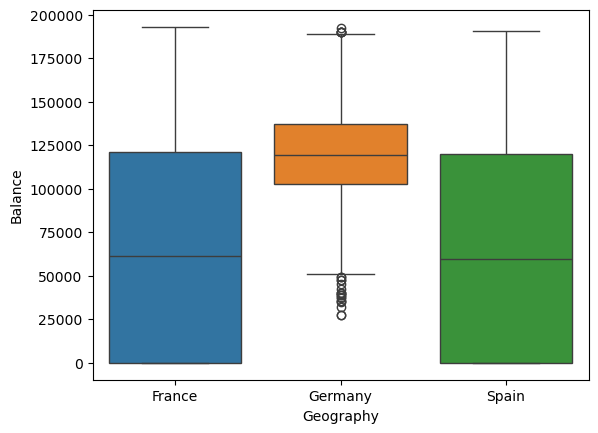

In [27]:
sns.boxplot(x="Geography", y="Balance", hue="Geography", data=data)
pass

Также построим скрипичный график для признаков "Geography" и "Balance"

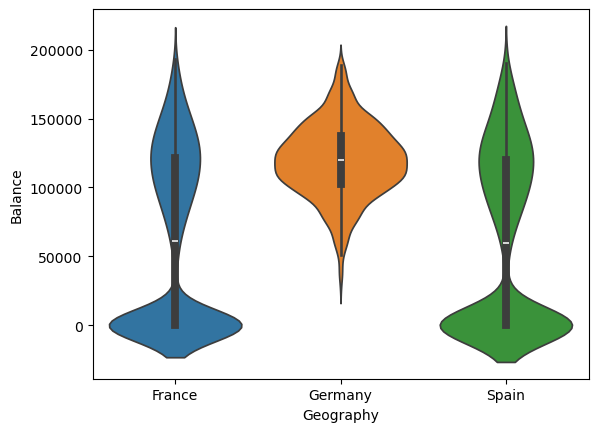

In [29]:
sns.violinplot(x="Geography", y="Balance", hue="Geography", data=data)
pass

Можно вычислить матрицу корреляции для количественных признаков:

In [31]:
corr_mat = data.loc[:, ~data.columns.isin(['Geography', 'Gender', 'Surname'])].corr()
corr_mat

RowNumber  CustomerId  CreditScore       Age    Tenure  \
RowNumber         1.000000    0.002737     0.005924  0.001596 -0.009108   
CustomerId        0.002737    1.000000     0.006667  0.010769 -0.016442   
CreditScore       0.005924    0.006667     1.000000 -0.005168  0.000781   
Age               0.001596    0.010769    -0.005168  1.000000 -0.010169   
Tenure           -0.009108   -0.016442     0.000781 -0.010169  1.000000   
Balance          -0.009339   -0.013089     0.008033  0.029685 -0.011431   
NumOfProducts     0.006824    0.016311     0.011672 -0.030418  0.012926   
HasCrCard         0.000939   -0.011307    -0.005737 -0.010802  0.023937   
IsActiveMember    0.012727    0.002192     0.026042  0.085170 -0.029256   
EstimatedSalary  -0.003401    0.012818    -0.000592 -0.004203  0.012347   
Exited           -0.016874   -0.005236    -0.027497  0.285778 -0.016448   

                  Balance  NumOfProducts  HasCrCard  IsActiveMember  \
RowNumber       -0.009339       0.006824   0.000939        0.012727   
CustomerId      -0.013089       0.016311  -0.011307        0.002192   
CreditScore      0.008033       0.011672  -0.005737        0.026042   
Age              0.029685      -0.030418  -0.010802        0.085170   
Tenure          -0.011431       0.012926   0.023937       -0.029256   
Balance          1.000000      -0.304738  -0.011909       -0.007909   
NumOfProducts   -0.304738       1.000000   0.004456        0.007896   
HasCrCard       -0.011909       0.004456   1.000000       -0.012437   
IsActiveMember  -0.007909       0.007896  -0.012437        1.000000   
EstimatedSalary  0.009848       0.014495  -0.011523       -0.009556   
Exited           0.113216      -0.046282  -0.004165       -0.157732   

                 EstimatedSalary    Exited  
RowNumber              -0.003401 -0.016874  
CustomerId              0.012818 -0.005236  
CreditScore            -0.000592 -0.027497  
Age                    -0.004203  0.285778  
Tenure                  0.012347 -0.016448  
Balance                 0.009848  0.113216  
NumOfProducts           0.014495 -0.046282  
HasCrCard              -0.011523 -0.004165  
IsActiveMember         -0.009556 -0.157732  
EstimatedSalary         1.000000  0.013109  
Exited                  0.013109  1.000000

Создадим визуальный образ этой матрицы:

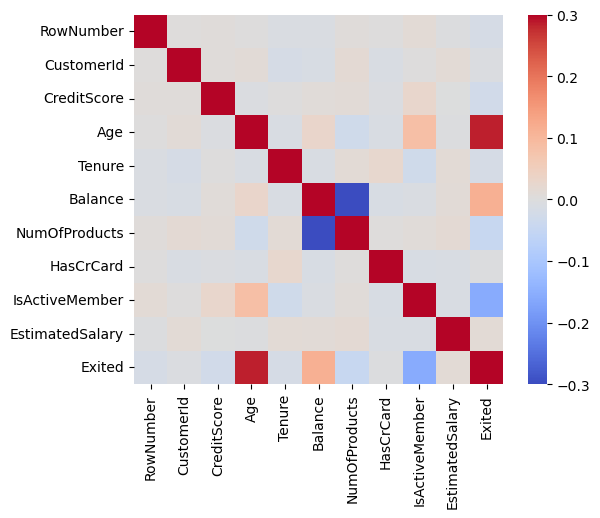

In [33]:
sns.heatmap(corr_mat, square=True, vmin=-0.3, vmax=0.3, cmap='coolwarm')
pass

Интересно посмотреть, сколько раз номинальные переменные принимают то или иное значение

In [35]:
data['Gender'].value_counts() 

Gender
Male      5382
Female    4469
Name: count, dtype: int64

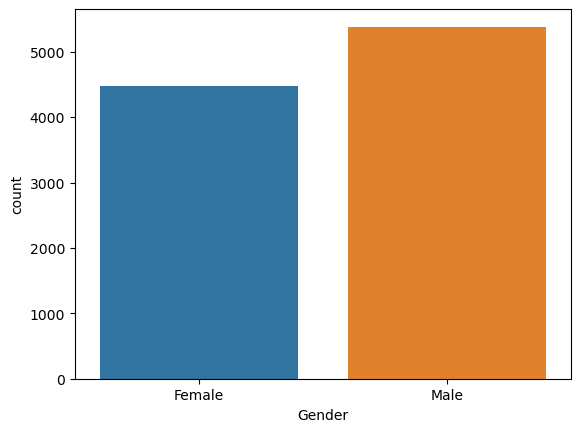

In [36]:
sns.countplot(x='Gender', hue='Gender', data=data)
pass

In [37]:
data['Geography'].value_counts() 

Geography
France     4936
Germany    2474
Spain      2441
Name: count, dtype: int64

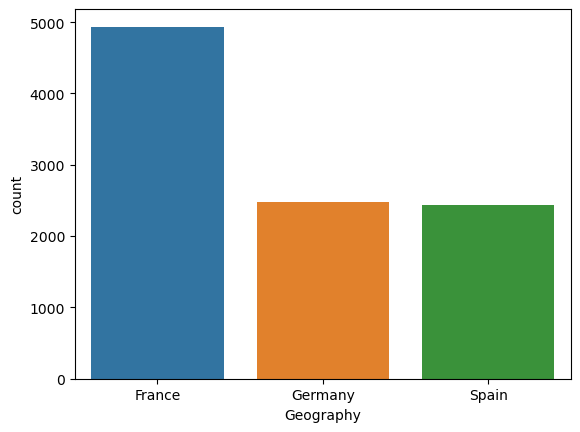

In [38]:
sns.countplot(x='Geography', order=data['Geography'].value_counts().index, hue='Geography', data=data)
pass

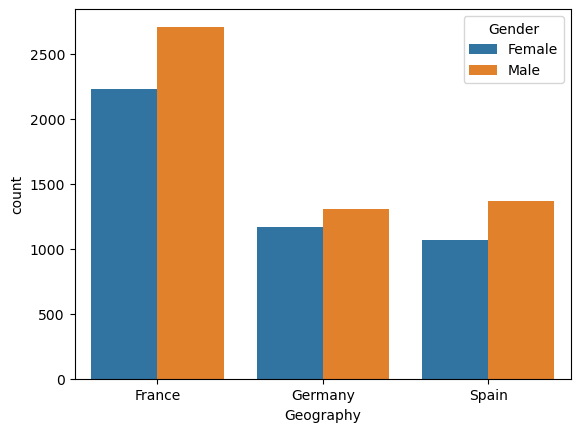

In [39]:
sns.countplot(x='Geography', order=data['Geography'].value_counts().index, hue='Gender', data=data)
pass

## 3. Заполнение пропущенных значений

Посмотрим, сколько пропущенных значений в каждом столбце матрицы:

In [42]:
data.isna().sum()  

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

Пропущенных значений нет.

## 4. Бинаризация номинальных признаков

Закодируем категориальные признаки с помощью числовых принаков.

In [46]:
data['Gender'] = pd.factorize(data['Gender'])[0]

In [47]:
data['Surname'] = pd.factorize(data['Surname'])[0]

In [48]:
data.head()

RowNumber  CustomerId  Surname  CreditScore Geography  Gender  Age  Tenure  \
0          1    15634602        0          619    France       0   42       2   
1          2    15647311        1          608     Spain       0   41       1   
2          3    15619304        2          502    France       0   42       8   
3          4    15701354        3          699    France       0   39       1   
4          5    15737888        4          850     Spain       0   43       2   

     Balance  NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  \
0       0.00              1          1               1        101348.88   
1   83807.86              1          0               1        112542.58   
2  159660.80              3          1               0        113931.57   
3       0.00              2          0               0         93826.63   
4  125510.82              1          1               1         79084.10   

   Exited  
0       1  
1       0  
2       1  
3       0  
4       0

In [49]:
Geography_dummies = pd.get_dummies(data['Geography'])

In [50]:
Geography_dummies.head()

France  Germany  Spain
0    True    False  False
1   False    False   True
2    True    False  False
3    True    False  False
4   False    False   True

In [51]:
data = pd.concat((data, Geography_dummies), axis=1)
data = data.drop(['Geography'], axis=1)

In [52]:
data.head()

RowNumber  CustomerId  Surname  CreditScore  Gender  Age  Tenure  \
0          1    15634602        0          619       0   42       2   
1          2    15647311        1          608       0   41       1   
2          3    15619304        2          502       0   42       8   
3          4    15701354        3          699       0   39       1   
4          5    15737888        4          850       0   43       2   

     Balance  NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  \
0       0.00              1          1               1        101348.88   
1   83807.86              1          0               1        112542.58   
2  159660.80              3          1               0        113931.57   
3       0.00              2          0               0         93826.63   
4  125510.82              1          1               1         79084.10   

   Exited  France  Germany  Spain  
0       1    True    False  False  
1       0   False    False   True  
2       1    True    False  False  
3       0    True    False  False  
4       0   False    False   True

## 5. Нормализация количественных признаков

Выполним стандартизацию всех признаков:

In [55]:
data_stand = (data - data.mean(axis = 0))/data.std(axis = 0)

In [56]:
data_stand.describe()

RowNumber    CustomerId      Surname   CreditScore        Gender  \
count  9.851000e+03  9.851000e+03  9851.000000  9.851000e+03  9.851000e+03   
mean   9.232511e-17  1.401106e-15     0.000000 -1.081935e-17 -4.976901e-17   
std    1.000000e+00  1.000000e+00     1.000000  1.000000e+00  1.000000e+00   
min   -1.732155e+00 -1.741580e+00    -1.226508 -3.108443e+00 -1.097349e+00   
25%   -8.661109e-01 -8.666056e-01    -0.821461 -6.875936e-01 -1.097349e+00   
50%   -7.598724e-04 -4.456214e-04    -0.277809  1.590106e-02  9.111949e-01   
75%    8.663236e-01  8.650540e-01     0.615717  6.987047e-01  9.111949e-01   
max    1.732368e+00  1.733918e+00     2.684014  2.064312e+00  9.111949e-01   

                Age        Tenure       Balance  NumOfProducts     HasCrCard  \
count  9.851000e+03  9.851000e+03  9.851000e+03   9.851000e+03  9.851000e+03   
mean   2.749918e-16  1.110787e-16  4.904772e-17  -1.255045e-16 -9.448898e-17   
std    1.000000e+00  1.000000e+00  1.000000e+00   1.000000e+00  1.000000e+00   
min   -1.991376e+00 -1.733740e+00 -1.226599e+00  -9.136481e-01 -1.548870e+00   
25%   -6.594007e-01 -6.963394e-01 -1.226599e+00  -9.136481e-01 -1.548870e+00   
50%   -1.836954e-01 -4.738913e-03  3.405584e-01  -9.136481e-01  6.455666e-01   
75%    4.822921e-01  6.868615e-01  8.311420e-01   8.049594e-01  6.455666e-01   
max    5.049063e+00  1.724262e+00  1.895554e+00   4.242174e+00  6.455666e-01   

       IsActiveMember  EstimatedSalary        Exited        France  \
count    9.851000e+03     9.851000e+03  9.851000e+03  9.851000e+03   
mean     8.655479e-17    -6.671932e-17 -1.586838e-17 -3.822837e-17   
std      1.000000e+00     1.000000e+00  1.000000e+00  1.000000e+00   
min     -1.030147e+00    -1.741216e+00 -5.042217e-01 -1.002083e+00   
25%     -1.030147e+00    -8.526413e-01 -5.042217e-01 -1.002083e+00   
50%      9.706370e-01     1.490414e-03 -5.042217e-01  9.978199e-01   
75%      9.706370e-01     8.555881e-01 -5.042217e-01  9.978199e-01   
max      9.706370e-01     1.739909e+00  1.983053e+00  9.978199e-01   

            Germany         Spain  
count  9.851000e+03  9.851000e+03  
mean   7.880093e-17  5.337546e-17  
std    1.000000e+00  1.000000e+00  
min   -5.790791e-01 -5.739218e-01  
25%   -5.790791e-01 -5.739218e-01  
50%   -5.790791e-01 -5.739218e-01  
75%    1.726704e+00 -5.739218e-01  
max    1.726704e+00  1.742221e+00

## 6. Отбор признаков

Для предсказания Exited будем использовать все входные данные, кроме RowNumber, CustomerId и Surname

In [59]:
data_stand.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Gender', 'Age',
       'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Exited', 'France', 'Germany', 'Spain'],
      dtype='object')

In [60]:
X = data_stand.drop(['Exited', 'RowNumber', 'CustomerId', 'Surname'], axis=1)
y = data['Exited']

Разобьем данные на обучающую и тестовую выборки в пропорции 3:1 (75% - обучающая выборка, 25% - тестовая):

In [62]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

N_train, N_test


(7388, 2463)

## 7. Обучаем модель
### kNN

In [64]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [65]:
y_test_predict = knn.predict(X_test)
err_test  = np.mean(y_test  != y_test_predict)

In [66]:
err_test

0.16727568006496144

### Подборка параметров

In [68]:
from sklearn.model_selection import GridSearchCV
nnb = [1, 3, 5, 10, 15, 20, 25, 35, 45, 55]
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid = {'n_neighbors': nnb}, cv=10)
grid.fit(X_train, y_train)

best_cv_err = 1 - grid.best_score_
best_n_neighbors = grid.best_estimator_.n_neighbors
print(best_cv_err, best_n_neighbors)

0.16878664862426707 25


Подобрали оптимальное значение для гиперпараметра метода k ближайших соседей, равное 25. 

Вычислим ошибку на обучающей и тестовой выборках при данном гиперпараметре:

In [70]:
knn = KNeighborsClassifier(n_neighbors = best_n_neighbors).fit(X_train, y_train)

err_train = np.mean(y_train != knn.predict(X_train))
err_test  = np.mean(y_test  != knn.predict(X_test))

print(err_train, err_test)

0.15755278830536004 0.1664636622005684


# Выводы

На языке программирования 'Python', с помощью библиотеки 'scikit-learn', для данного датасета были визуализированы данные и вычислены основные характеристики, убедились, что в датасете нет пропущенных значений, закодировали все категориальные признаки датасета с помощью числовых признаков, выполнили нормализацию количественных признаков методом стандартизации, а также отобрали нужные данные для предсказания целевого значения. Модель была обучена с помощью метода k ближайших соседей. Воспользовавшись встроенной функцией 'GridSearchCV', нашли оптимальное значение гиперпараметра метода k ближайших соседей, равное 25. Получили ошибку на обучающей выборке, равную 0.15755278830536004, на тестовой - 0.1664636622005684.